In [27]:
import numpy as np
from sklearn.linear_model import *
from lineartree import LinearTreeRegressor
import matplotlib.pyplot as plt
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pp = pprint.PrettyPrinter(indent=4)
import time
import lightgbm as lgb
import pandas as pd

In [28]:
# Read the data from the csv file
data = np.genfromtxt('data/PHTSV_Table_HMAX_Adjusted.csv', delimiter=',')
data = data[1:, :]

# 2 D array containing Pressure and Enthalpy data
P_H = data[:, 0:2]

# Scale the pressure to bar and scale the enthalpy to kJ/mol
P_H[:, 0] = P_H[:, 0] / 1e5
P_H[:, 1] = P_H[:, 1] / 1000
minP = np.min(data[:, 0])
maxP = np.max(data[:, 0])
minH = np.min(data[:, 1])
maxH = np.max(data[:, 1])
print(minH)
print(maxH)
print(minP)
print(maxP)

# Vector containing Temperatures
T = data[:, 2]
minT = np.min(T)
maxT = np.max(T)

1.27588638
65.523
1.0
250.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(P_H, T, test_size=0.2, random_state=42)

# num_iterations

In [30]:
train_data_linear = lgb.Dataset(
    X_train, label=y_train, params={'linear_tree': True, })
lgb_dic = {}
num_iterations = np.arange(20, 110, 10)
for i in range(len(num_iterations)):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': 60,
        'num_iterations': num_iterations[i],
        'max_depth': 8,
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': len(df[df["right_child"].isnull()])}


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.1199042797088623 s
Linear trees error: 4.099
numer of leaves: 2000


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.2305309772491455 s
Linear trees error: 0.93
numer of leaves: 3000


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.2795674800872803 s
Linear trees error: 0.693
numer of leaves: 4000


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.2602722644805908 s
Linear trees error: 0.592
numer of leaves: 4977


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.32369279861450195 s
Linear trees error: 0.528
numer of leaves: 5856


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3050658702850342 s
Linear trees error: 0.472
numer of leaves: 6743


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.525592565536499 s
Linear trees error: 0.448
numer of leaves: 7590


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.49100542068481445 s
Linear trees error: 0.422
numer of leaves: 8499


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3330116271972656 s
Linear trees error: 0.397
numer of leaves: 9314


In [31]:
LT_dic = {}
time_start=time.time()
regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=60,
                           min_samples_leaf=8, max_depth=8, min_impurity_decrease=0.1)
regr.fit(X_train, y_train)
time_end = time.time()
LT_dic['time'] = time_end - time_start
print('time cost:', LT_dic['time'], 's')
y_pred = regr.predict(X_test)
LT_dic['mse'] = round(mean_squared_error(y_pred, y_test),3)
print(f"Linear trees error: {LT_dic['mse']}")
LT_dic['num_leaves'] = len(regr.summary(only_leaves=True))
print('numer of leaves:', LT_dic['num_leaves'])

time cost: 6.255917549133301 s
Linear trees error: 0.388
numer of leaves: 147


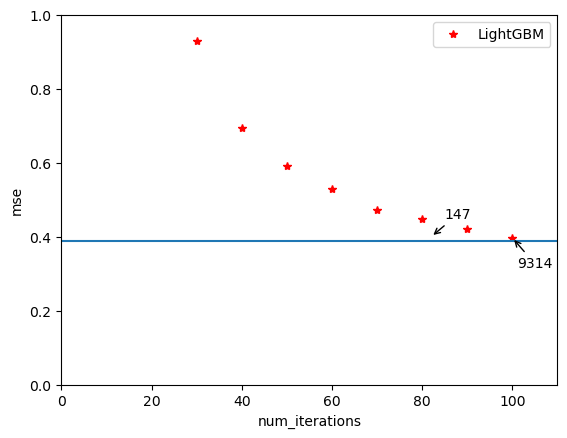

In [32]:
for i in range(len(num_iterations)):
    plt.plot(num_iterations[i], lgb_dic['model'+str(i)]['mse'], 'r*')
    if i == len(num_iterations)-1:
    #     print('last')
        plt.annotate(lgb_dic['model' + str(i)]['num_leaves'],
                    xy=(num_iterations[i], lgb_dic['model' + str(i)]['mse']), 
                    xytext=(num_iterations[i]+1, lgb_dic['model' + str(i)]['mse']-0.08), 
                    arrowprops=dict(arrowstyle="->"))
plt.axhline(y=LT_dic['mse'])
plt.annotate(str(LT_dic['num_leaves']),
             xy=(82, 0.40),
             xytext=(85, 0.45),
             arrowprops=dict(arrowstyle="- >"))
plt.ylim(0, 1)
plt.xlim(0, 110)
plt.ylabel("mse")
plt.xlabel("num_iterations")
plt.legend(labels=['LightGBM'])

# max_bins

In [33]:
max_bins = np.arange(20, 100, 10)
lgb_dic = {}
for i in range(len(max_bins)):
    train_data_linear = lgb.Dataset(
        X_train, label=y_train, params={'linear_tree': True, })
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': max_bins[i],
        'num_iterations': 100,
        'max_depth': 8,
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start, 
                        'mse': round(mean_squared_error(y_test, y_pred_linear), 3), 
                        'num_leaves': len(df[df["right_child"].isnull()])}

c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.4211270809173584 s
Linear trees error: 5.719
numer of leaves: 9832


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.40531229972839355 s
Linear trees error: 1.992
numer of leaves: 9926


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3141517639160156 s
Linear trees error: 1.59
numer of leaves: 9598


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.29050588607788086 s
Linear trees error: 1.397
numer of leaves: 9447


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3747227191925049 s
Linear trees error: 0.397
numer of leaves: 9314


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.36399102210998535 s
Linear trees error: 0.542
numer of leaves: 8949


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3492882251739502 s
Linear trees error: 0.566
numer of leaves: 8989


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.38336658477783203 s
Linear trees error: 0.56
numer of leaves: 8997


In [34]:
LT_dic = {}
for i in range(len(max_bins)):
    time_start = time.time()
    regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=max_bins[i],
                               min_samples_leaf=8, max_depth=8, min_impurity_decrease=0.1)
    regr.fit(X_train, y_train)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = regr.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    print('numer of leaves:', len(regr.summary(only_leaves=True)))
    LT_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': len(regr.summary(only_leaves=True))}
time_start=time.time()

time cost: 2.5189476013183594 s
Linear trees error: 5.431
numer of leaves: 109
time cost: 3.456486463546753 s
Linear trees error: 2.969
numer of leaves: 150
time cost: 5.056483030319214 s
Linear trees error: 1.049
numer of leaves: 151
time cost: 7.057682514190674 s
Linear trees error: 1.498
numer of leaves: 156
time cost: 6.51258111000061 s
Linear trees error: 0.388
numer of leaves: 147
time cost: 7.791249752044678 s
Linear trees error: 0.942
numer of leaves: 138
time cost: 11.150051593780518 s
Linear trees error: 0.572
numer of leaves: 147
time cost: 10.375229358673096 s
Linear trees error: 0.374
numer of leaves: 145


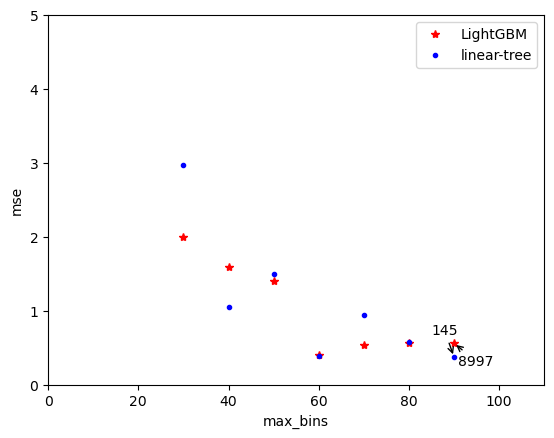

In [35]:
for i in range(len(max_bins)):
    plt.plot(max_bins[i], lgb_dic['model' + str(i)]['mse'], 'r*')
    plt.plot(max_bins[i], LT_dic['model' + str(i)]['mse'], 'b.')
    if i == len(max_bins) - 1:
    #     print('last')
        plt.annotate(lgb_dic['model' + str(i)]['num_leaves'],
                        xy=(max_bins[i], lgb_dic['model' + str(i)]['mse']),
                        xytext=(max_bins[i] + 1,
                                lgb_dic['model' + str(i)]['mse'] - 0.3),
                        arrowprops=dict(arrowstyle="->"))
        plt.annotate(LT_dic['model' + str(i)]['num_leaves'],
                     xy=(max_bins[i], LT_dic['model' + str(i)]['mse']),
                     xytext=(max_bins[i] - 5,
                             LT_dic['model' + str(i)]['mse'] + 0.3),
                     arrowprops=dict(arrowstyle="->"))
plt.ylim(0, 5)
plt.xlim(0, 110)
plt.ylabel("mse")
plt.xlabel("max_bins")
plt.legend(labels=['LightGBM', 'linear-tree'])

# max_depth

In [36]:
max_depth = np.arange(2, 10, 1)
lgb_dic = {}
for i in range(len(max_depth)):
    train_data_linear = lgb.Dataset(
        X_train, label=y_train, params={'linear_tree': True, })
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': 60,
        'num_iterations': 100,
        'max_depth': max_depth[i],
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': len(df[df["right_child"].isnull()])}


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.053827762603759766 s
Linear trees error: 27.939
numer of leaves: 400
time cost: 0.06582331657409668 s
Linear trees error: 7.55
numer of leaves: 800
time cost: 0.0887613296508789 s
Linear trees error: 2.461


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 1553
time cost: 0.12070274353027344 s
Linear trees error: 1.557


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 3004
time cost: 0.16253256797790527 s
Linear trees error: 0.824


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 5281


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.25927734375 s
Linear trees error: 0.544
numer of leaves: 8113


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.29319024085998535 s
Linear trees error: 0.397
numer of leaves: 9314


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3101358413696289 s
Linear trees error: 0.368
numer of leaves: 9866


In [37]:
LT_dic = {}
for i in range(len(max_depth)):
    time_start = time.time()
    regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=60,
                               min_samples_leaf=8, max_depth=max_depth[i], min_impurity_decrease=0.1)
    regr.fit(X_train, y_train)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = regr.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    print('numer of leaves:', len(regr.summary(only_leaves=True)))
    LT_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': len(regr.summary(only_leaves=True))}
time_start=time.time()

time cost: 1.1874303817749023 s
Linear trees error: 442.585
numer of leaves: 4
time cost: 1.6553502082824707 s
Linear trees error: 123.02
numer of leaves: 8
time cost: 2.939729690551758 s
Linear trees error: 36.749
numer of leaves: 16
time cost: 3.899263620376587 s
Linear trees error: 5.788
numer of leaves: 32
time cost: 5.340626955032349 s
Linear trees error: 1.624
numer of leaves: 59
time cost: 6.7527430057525635 s
Linear trees error: 0.719
numer of leaves: 104
time cost: 5.777544736862183 s
Linear trees error: 0.388
numer of leaves: 147
time cost: 5.833394527435303 s
Linear trees error: 0.37
numer of leaves: 157


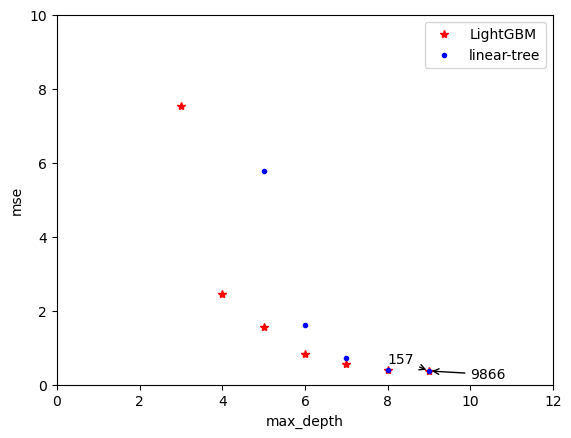

In [38]:
for i in range(len(max_depth)):
    plt.plot(max_depth[i], lgb_dic['model' + str(i)]['mse'], 'r*')
    plt.plot(max_depth[i], LT_dic['model' + str(i)]['mse'], 'b.')
    if i == len(max_bins) - 1:
    #     print('last')
        plt.annotate(lgb_dic['model' + str(i)]['num_leaves'],
                     xy=(max_depth[i], lgb_dic['model' + str(i)]['mse']),
                     xytext=(max_depth[i] + 1,
                                lgb_dic['model' + str(i)]['mse'] - 0.2),
                        arrowprops=dict(arrowstyle="->"))
        plt.annotate(LT_dic['model' + str(i)]['num_leaves'],
                     xy=(max_depth[i], LT_dic['model' + str(i)]['mse']),
                     xytext=(max_depth[i] - 1,
                             LT_dic['model' + str(i)]['mse'] + 0.2),
                     arrowprops=dict(arrowstyle="->"))
plt.ylim(0, 10)
plt.xlim(0, 12)
plt.ylabel("mse")
plt.xlabel("max_depth")
plt.legend(labels=['LightGBM', 'linear-tree'])

# prediction of optimal model

In [39]:
time_start = time.time()
regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=60,
                           min_samples_leaf=8, max_depth=10, min_impurity_decrease=0.1)
regr.fit(X_train, y_train)
time_end = time.time()
print('time cost:', time_end, 's')
y_pred_linear = regr.predict(X_test)
print(f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear), 3)}")

print('numer of leaves:', len(regr.summary(only_leaves=True)))

time cost: 1677181759.5174875 s
Linear trees error: 0.367
numer of leaves: 159


In [46]:
# regr.plot_model()

In [54]:
regr.summary()

{0: {'col': 1,
  'th': 38.26665,
  'loss': 1572.64638,
  'samples': 8000,
  'children': (1, 2),
  'models': (LinearRegression(), LinearRegression())},
 1: {'col': 1,
  'th': 23.34055,
  'loss': 421.82154,
  'samples': 4635,
  'children': (3, 4),
  'models': (LinearRegression(), LinearRegression())},
 2: {'col': 1,
  'th': 52.54379,
  'loss': 278.60686,
  'samples': 3365,
  'children': (117, 118),
  'models': (LinearRegression(), LinearRegression())},
 3: {'col': 0,
  'th': 21.12121,
  'loss': 87.85061,
  'samples': 2778,
  'children': (5, 6),
  'models': (LinearRegression(), LinearRegression())},
 4: {'col': 0,
  'th': 68.90909,
  'loss': 177.28719,
  'samples': 1857,
  'children': (51, 52),
  'models': (LinearRegression(), LinearRegression())},
 5: {'col': 1,
  'th': 12.30822,
  'loss': 123.00982,
  'samples': 251,
  'children': (7, 8),
  'models': (LinearRegression(), LinearRegression())},
 6: {'col': 1,
  'th': 18.79783,
  'loss': 16.71461,
  'samples': 2527,
  'children': (27, 28),

In [53]:
lgb_dic = {}
train_data_linear = lgb.Dataset(
    X_train, label=y_train, params={'linear_tree': True, })
params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.2,
    'num_leaves': 100,
    "verbosity": -1,
    'min_samples_leaf': 8,
    'max_bin': 60,
    'num_iterations': 100,
    'max_depth': 10,
}
time_start = time.time()
model_linear = lgb.train(params, train_data_linear)
time_end = time.time()
print('time cost:', time_end - time_start, 's')
y_pred_linear = model_linear.predict(X_test)
print(
    f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
df = model_linear.trees_to_dataframe()
# len(df[df["right_child"].isnull()]) == len(
#     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
print('numer of leaves:', len(df[df["right_child"].isnull()]))

c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.5166172981262207 s
Linear trees error: 0.408
numer of leaves: 9975


In [45]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'
# lgb.plot_tree(model_linear)
# for i in range(params['num_iterations']):
# p = lgb.create_tree_digraph(model_linear, params['num_iterations'] - 1)
p = lgb.create_tree_digraph(model_linear, -1)
# p


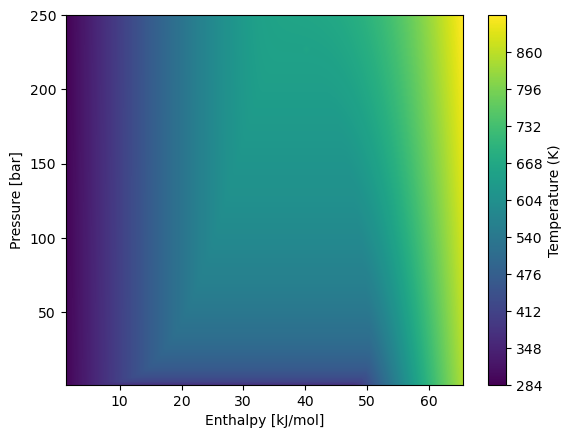

In [43]:
df = pd.read_csv('data/PHTSV_Table_HMAX_Adjusted.csv')
x = df['H(J/mol)'] / 1000
x = np.array(x)
x.shape = (100, 100)

y = df['P(Pa)'] / 100000
y = np.array(y)
y.shape = (100, 100)

z = df['T(K)']
z = np.array(z)
z.shape = (100, 100)

plt.contourf(x, y, z, 1000)
plt.ylabel('Pressure [bar]')
plt.xlabel('Enthalpy [kJ/mol]')
plt.colorbar(label='Temperature (K)')
plt.show()

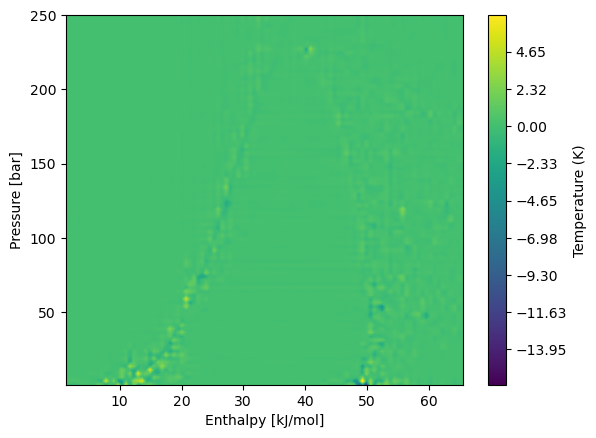

In [44]:
T_hat = model_linear.predict(P_H)
T_hat.shape = (100, 100)

plt.contourf(x, y, T_hat-z, 1000)
plt.ylabel('Pressure [bar]')
plt.xlabel('Enthalpy [kJ/mol]')
plt.colorbar(label='Temperature (K)')
plt.show()
